In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
rng = np.random.default_rng(123)
n= 2000 

## We proceed now to create the synthetic data

mean = [0,2]

sigma_1 = 1
sigma_2 = 1.5
rho = 0.6

cov = [[sigma_1**2, rho*sigma_1*sigma_2],
       [rho*sigma_1*sigma_2, sigma_2**2]]

mean = [0,2]

X1, X2 = rng.multivariate_normal(mean = mean, cov = cov, size = n).T

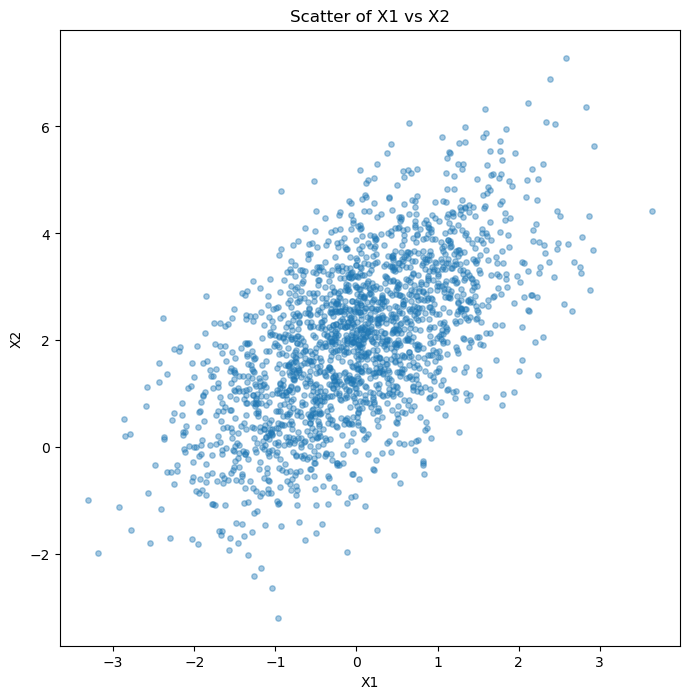

In [12]:
fig, ax = plt.subplots(figsize = (8,8))
ax.scatter(X1, X2, alpha=0.4, s = 15)
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_title("Scatter of X1 vs X2")
plt.show()

In [22]:
X3 = rng.gamma(shape = 2, scale = 1, size = n)
X4 = rng.gamma(shape=5, scale = 0.5, size = n)

B1 = rng.binomial(n=1, p=0.5, size=n)
B2 = rng.binomial(n=1, p=0.2, size=n)

C = rng.choice([0,1,2,3], size = n, p = [0.1, 0.3, 0.4, 0.2])

# Combine all predictors
data = pd.DataFrame({
    "X1": X1,
    "X2": X2,
    "X3": X3,
    "X4": X4,
    "B1": B1,
    "B2": B2,
    "C": C
})

dummies_C = pd.get_dummies(data['C'], prefix='C', drop_first=True).astype(int)

data_full = pd.concat([data, dummies_C], axis = 1)

data_full['X2_sq'] = data['X2']**2
data_full['X1_B1'] = data_full['X1']*data_full['B1']

data_full.head()

,X1,X2,X3,X4,B1,B2,C,C_1,C_2,C_3,X2_sq,X1_B1
0,0.993252,3.321703,0.884884,1.709717,1,0,2,0,1,0,11.033712,0.993252
1,-1.109631,0.182956,1.758788,0.776433,1,0,3,0,0,1,0.033473,-1.109631
2,-1.075525,0.849565,2.136953,2.784648,1,0,1,1,0,0,0.721760,-1.075525
3,0.137186,3.112997,0.429407,3.399634,0,0,2,0,1,0,9.690751,0.000000
4,0.449859,2.354038,4.042620,2.674810,0,1,1,1,0,0,5.541494,0.000000
